# NBA Player Data Analysis

## Predictions
1. I think that 3pt shooting % has trended upwards because teams are realizing how efficient they are (3pt revolution)
2. I think that the average player height has gone down (players don't have to rely on being tall and being able to dunk, they can shoot 3 pointers)
3. I think that 3pt% generally increases with 2pt%, but the players with the highest 2pt% have the worst 3pt% (since like 2012 maybe) (taller players, typically centers, have the best 2pt shooting percentage, but they can't shoot 3s because they don't have to rely on shooting)
4. I think that the average number of 3pt attempts/game has gone up since 1996 (3pt revolution)
6. I think that "Joe" is the most common first name.
7. I think that FT% increases with 3P%
7. I think that 3PT% decreases with weight
8. i think that the most common last name is smith
9. I think that the average height in the NBA is 6'3", or 190.5 cm
10. I think that 

In [25]:
import pandas as pd
import numpy as np
import matplotlib

In [78]:
players = pd.read_csv('./more-data/Players.csv')
all_seasons = pd.read_csv('./all_seasons.csv')
games_from_2004 = pd.read_csv("./more-data/games.csv")
player_data = pd.read_csv("./more-data/player_data.csv")

In [98]:
# working on height vs year entered league

def height_to_inches(height):
    print(str(height))
    # return int(str(height).split("-")[0]) * 12 + int(str(height).split("-")[1])
player_data["height"] = player_data["height"].apply(height_to_inches)
player_data["height"]

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


0       None
1       None
2       None
3       None
4       None
        ... 
4545    None
4546    None
4547    None
4548    None
4549    None
Name: height, Length: 4550, dtype: object

<AxesSubplot:title={'center':'Average Points per Game, per Team'}, xlabel='year', ylabel='Points per Team per Game'>

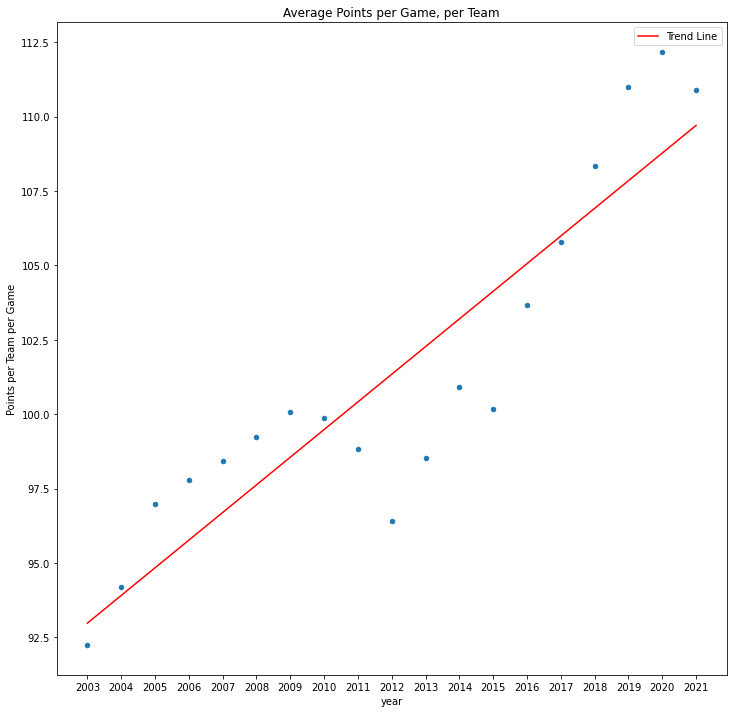

In [76]:
def get_year(date):
    return date.split("-")[0]
games_from_2004["GAME_DATE_EST"] = games_from_2004["GAME_DATE_EST"].apply(get_year)
games_from_2004 = games_from_2004.sort_values(by="GAME_DATE_EST")
years = games_from_2004["GAME_DATE_EST"].unique()
avg_pts = []
for year in years:
    avg_pts.append((games_from_2004[games_from_2004["GAME_DATE_EST"] == year]["PTS_home"].mean(
    ) + games_from_2004[games_from_2004["GAME_DATE_EST"] == year]["PTS_away"].mean()) / 2)
new_df = pd.DataFrame({"year": years, "pts": avg_pts})
d = np.polyfit(pd.to_numeric(new_df["year"]), pd.to_numeric(new_df["pts"]), 1)
f = np.poly1d(d)
new_df.insert(1, 'Trend Line', f(pd.to_numeric(new_df["year"])))
plot = new_df.plot(kind="scatter", x="year", y="pts", figsize=(12, 12), title="Average Points per Game, per Team", xlabel="Year", ylabel="Points per Team per Game")
new_df.plot(x="year", y="Trend Line", color="Red", ax=plot)
# games_from_2004.plot(kind="scatter", x="GAME_DATE_EST", y="PTS_home")



<AxesSubplot:title={'center':'Average Height: 198.70492221372098 cm'}, ylabel='Density'>

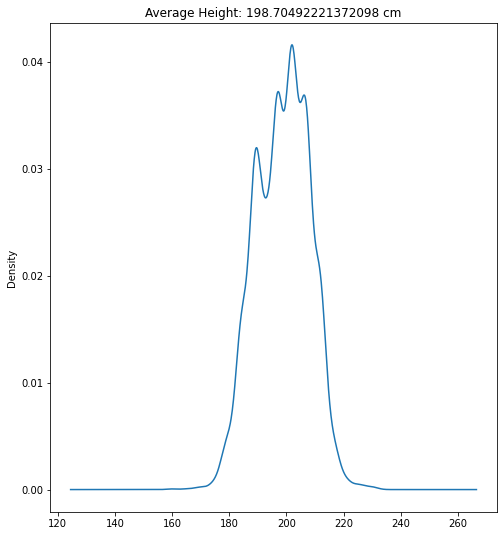

In [36]:
players["height"].plot(kind="density",
                        figsize=(8,9),
                        title="Average Height: {} cm".format(players["height"].mean()),
                        ylabel="Density of Player Heights",
                        xlabel="Height (cm)")
# height density graph of every player from 1960-2017

[]

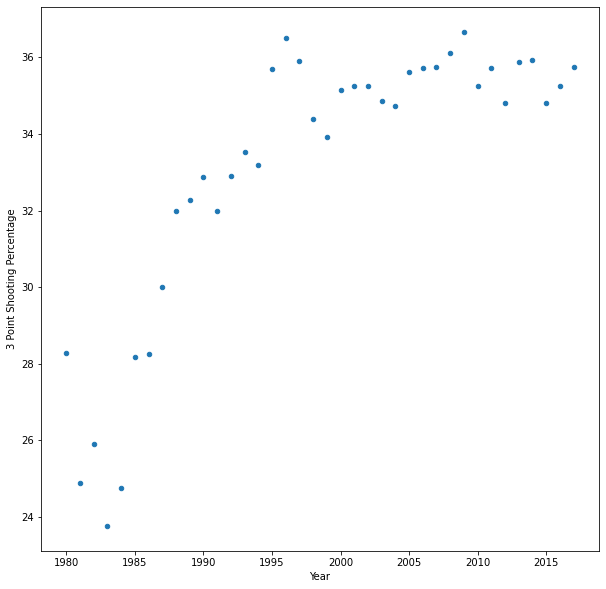

In [7]:
player_season_data = pd.read_csv('./more-data/Seasons_Stats.csv')
# player_season_data['height'] *= 0.393700787

all_years = player_season_data['Year'].unique()
years = [float(year) for year in all_years]

yearly_3p_percent = []

for year in all_years:
    avg_3p_percent = 100 * player_season_data[player_season_data['Year'] == year]['3P'].mean() / player_season_data[player_season_data['Year'] == year]['3PA'].mean()
    yearly_3p_percent.append(avg_3p_percent)


yearly_3p = pd.DataFrame({'year': all_years,
                            '3p%': yearly_3p_percent})

yearly_3p_percentage_plot = yearly_3p.plot(kind='scatter',
                x='year',
                y='3p%',
                xlabel='Year',
                ylabel="3 Point Shooting Percentage",
                figsize=(10, 10))


yearly_3p_percentage_plot.plot()

<AxesSubplot:xlabel='Most Common First Names', ylabel='Number of Players With First Name'>

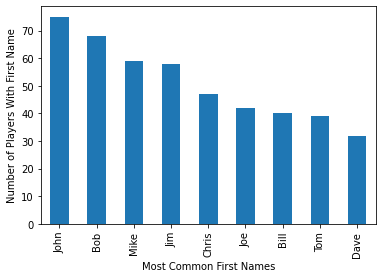

In [8]:
all_players = pd.read_csv('./more-data/Players.csv')
all_players['Player'].str.split(' ').str[0].value_counts()[:9].plot(kind="bar", xlabel="Most Common First Names", ylabel="Number of Players With First Name")
# all_players['Player'].str.split(' ').str[1].value_counts()[:9].plot(kind="bar", xlabel="Most Common Last Names", ylabel="Number of Players With Last Name")
# The most common first name is John
# The most common last name is Williams

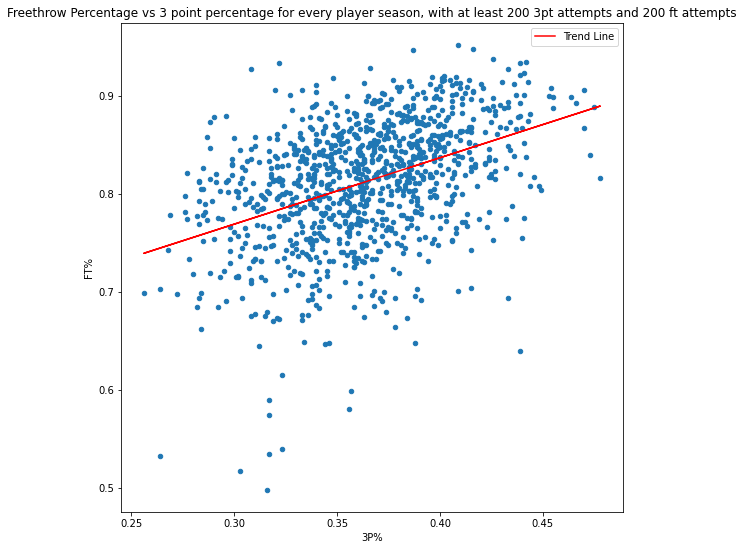

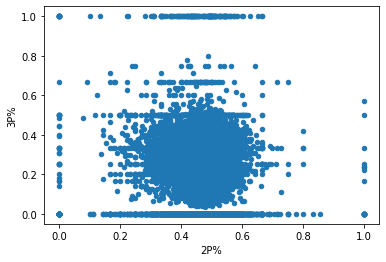

In [13]:
filter_player_season_data_for_3p_and_ft = player_season_data[(player_season_data['3PA'] > 200) & (player_season_data['FTA'] > 200)]
d = np.polyfit(filter_player_season_data_for_3p_and_ft['3P%'], filter_player_season_data_for_3p_and_ft['FT%'], 1)
f = np.poly1d(d)
filter_player_season_data_for_3p_and_ft.insert(
    53, 'Trend Line', f(filter_player_season_data_for_3p_and_ft['3P%']))

plot = filter_player_season_data_for_3p_and_ft.plot(
                                            kind='scatter',
                                            x='3P%',
                                            y='FT%',
                                            figsize=(9, 9),
                                            title='Freethrow Percentage vs 3 point percentage for every player season, with at least 200 3pt attempts and 200 ft attempts')

filter_player_season_data_for_3p_and_ft.plot(x='3P%', y='Trend Line', color='Red', ax=plot)


<AxesSubplot:xlabel='year', ylabel='3PA'>

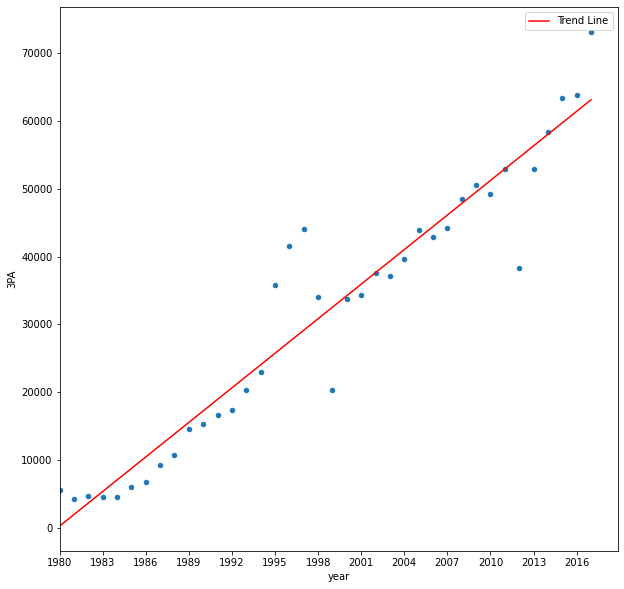

In [10]:
yearly_3pa = []
years = []

for year in all_years:
    if year >= 1980:
        tot_3pa = player_season_data[(player_season_data['Year'] == year) & (player_season_data['3PA'] > 0)]['3PA'].sum()
        yearly_3pa.append(tot_3pa)
        years.append(year)

yearly_3pa_and_year = pd.DataFrame({'year': years,
                                '3PA': yearly_3pa})

e = np.polyfit(
    yearly_3pa_and_year['year'], yearly_3pa_and_year['3PA'], 1)
f = np.poly1d(e)

yearly_3pa_and_year.insert(2, 'Trend Line', f(yearly_3pa_and_year['year']))

plot = yearly_3pa_and_year.plot(kind='scatter',
                        x='year',
                        y='3PA',
                        xlim=1980,
                        figsize=(10, 10),
                        xticks=years[::3])

yearly_3pa_and_year.plot(x='year', y='Trend Line', color='Red', ax=plot)

In [11]:
all_seasons['season'].str.split('-')[0]

['1996', '97']